<a href="https://colab.research.google.com/github/rayxuan2000/Project/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Scope: Using IBM data sets to predict customers' behaviour (churn or not) to retain customers.

#1. Loading Data

In [123]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [124]:
#https://drive.google.com/file/d/19k3GuWq-Ps199vadpzjWuUJKC9qZvqD6/view?usp=drive_link
id = "19k3GuWq-Ps199vadpzjWuUJKC9qZvqD6"
file = drive.CreateFile({'id':id})
file.GetContentFile('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [125]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Exploratory Data Analysis and Data Cleaning

In [126]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
df['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

The customerID is unique and can be dropped.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [129]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [130]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [131]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [132]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The type of TotalCharges is object, that's strange because it should be float64.

In [133]:
df['TotalCharges'].value_counts()
# 11 " " values

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

There are 11 space values and should be seen as NaN.

In [134]:
space_df=df[df['TotalCharges']==' ']
space_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can set them as NaN and replace by mean value of the column.

In [135]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [136]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [137]:
df[['TotalCharges']].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [138]:
df=df.fillna(df['TotalCharges'].mean())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data is relatively clean right now.

In [140]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
# check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Churn', ylabel='tenure'>

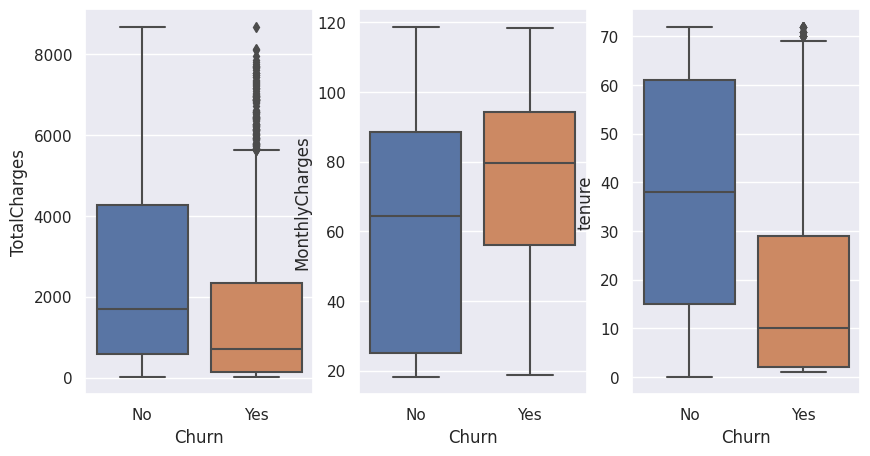

In [142]:
_,axss = plt.subplots(1,3, figsize=[10,5],squeeze=False)
sns.boxplot(x='Churn', y ='TotalCharges',data=df, ax=axss[0][0])
sns.boxplot(x='Churn', y ='MonthlyCharges',data=df, ax=axss[0][1])
sns.boxplot(x='Churn', y ='tenure',data=df, ax=axss[0][2])

Observation:

1. People with high monthly charges tend to churn.

2. The less number of months the customer has stayed with the company, the more possible customers tend to churn.

[Text(0.5, 0, 'TotalCharges'),
 Text(1.5, 0, 'MonthlyCharges'),
 Text(2.5, 0, 'tenure')]

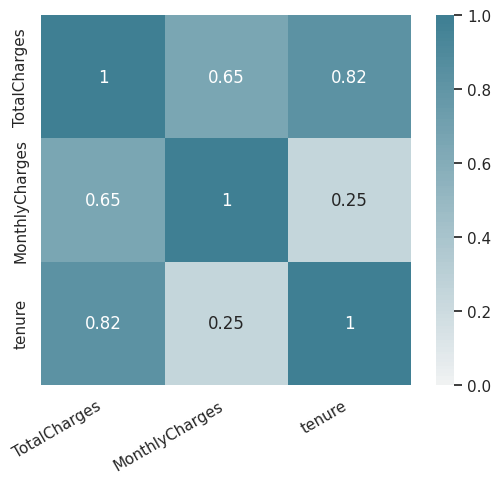

In [143]:
corr=df[['TotalCharges','MonthlyCharges','tenure']].corr()
ax = sns.heatmap(
    corr,
    vmin=0, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right')

Observation: There is no strong correlation between different numerical features.

<Axes: xlabel='Churn', ylabel='count'>

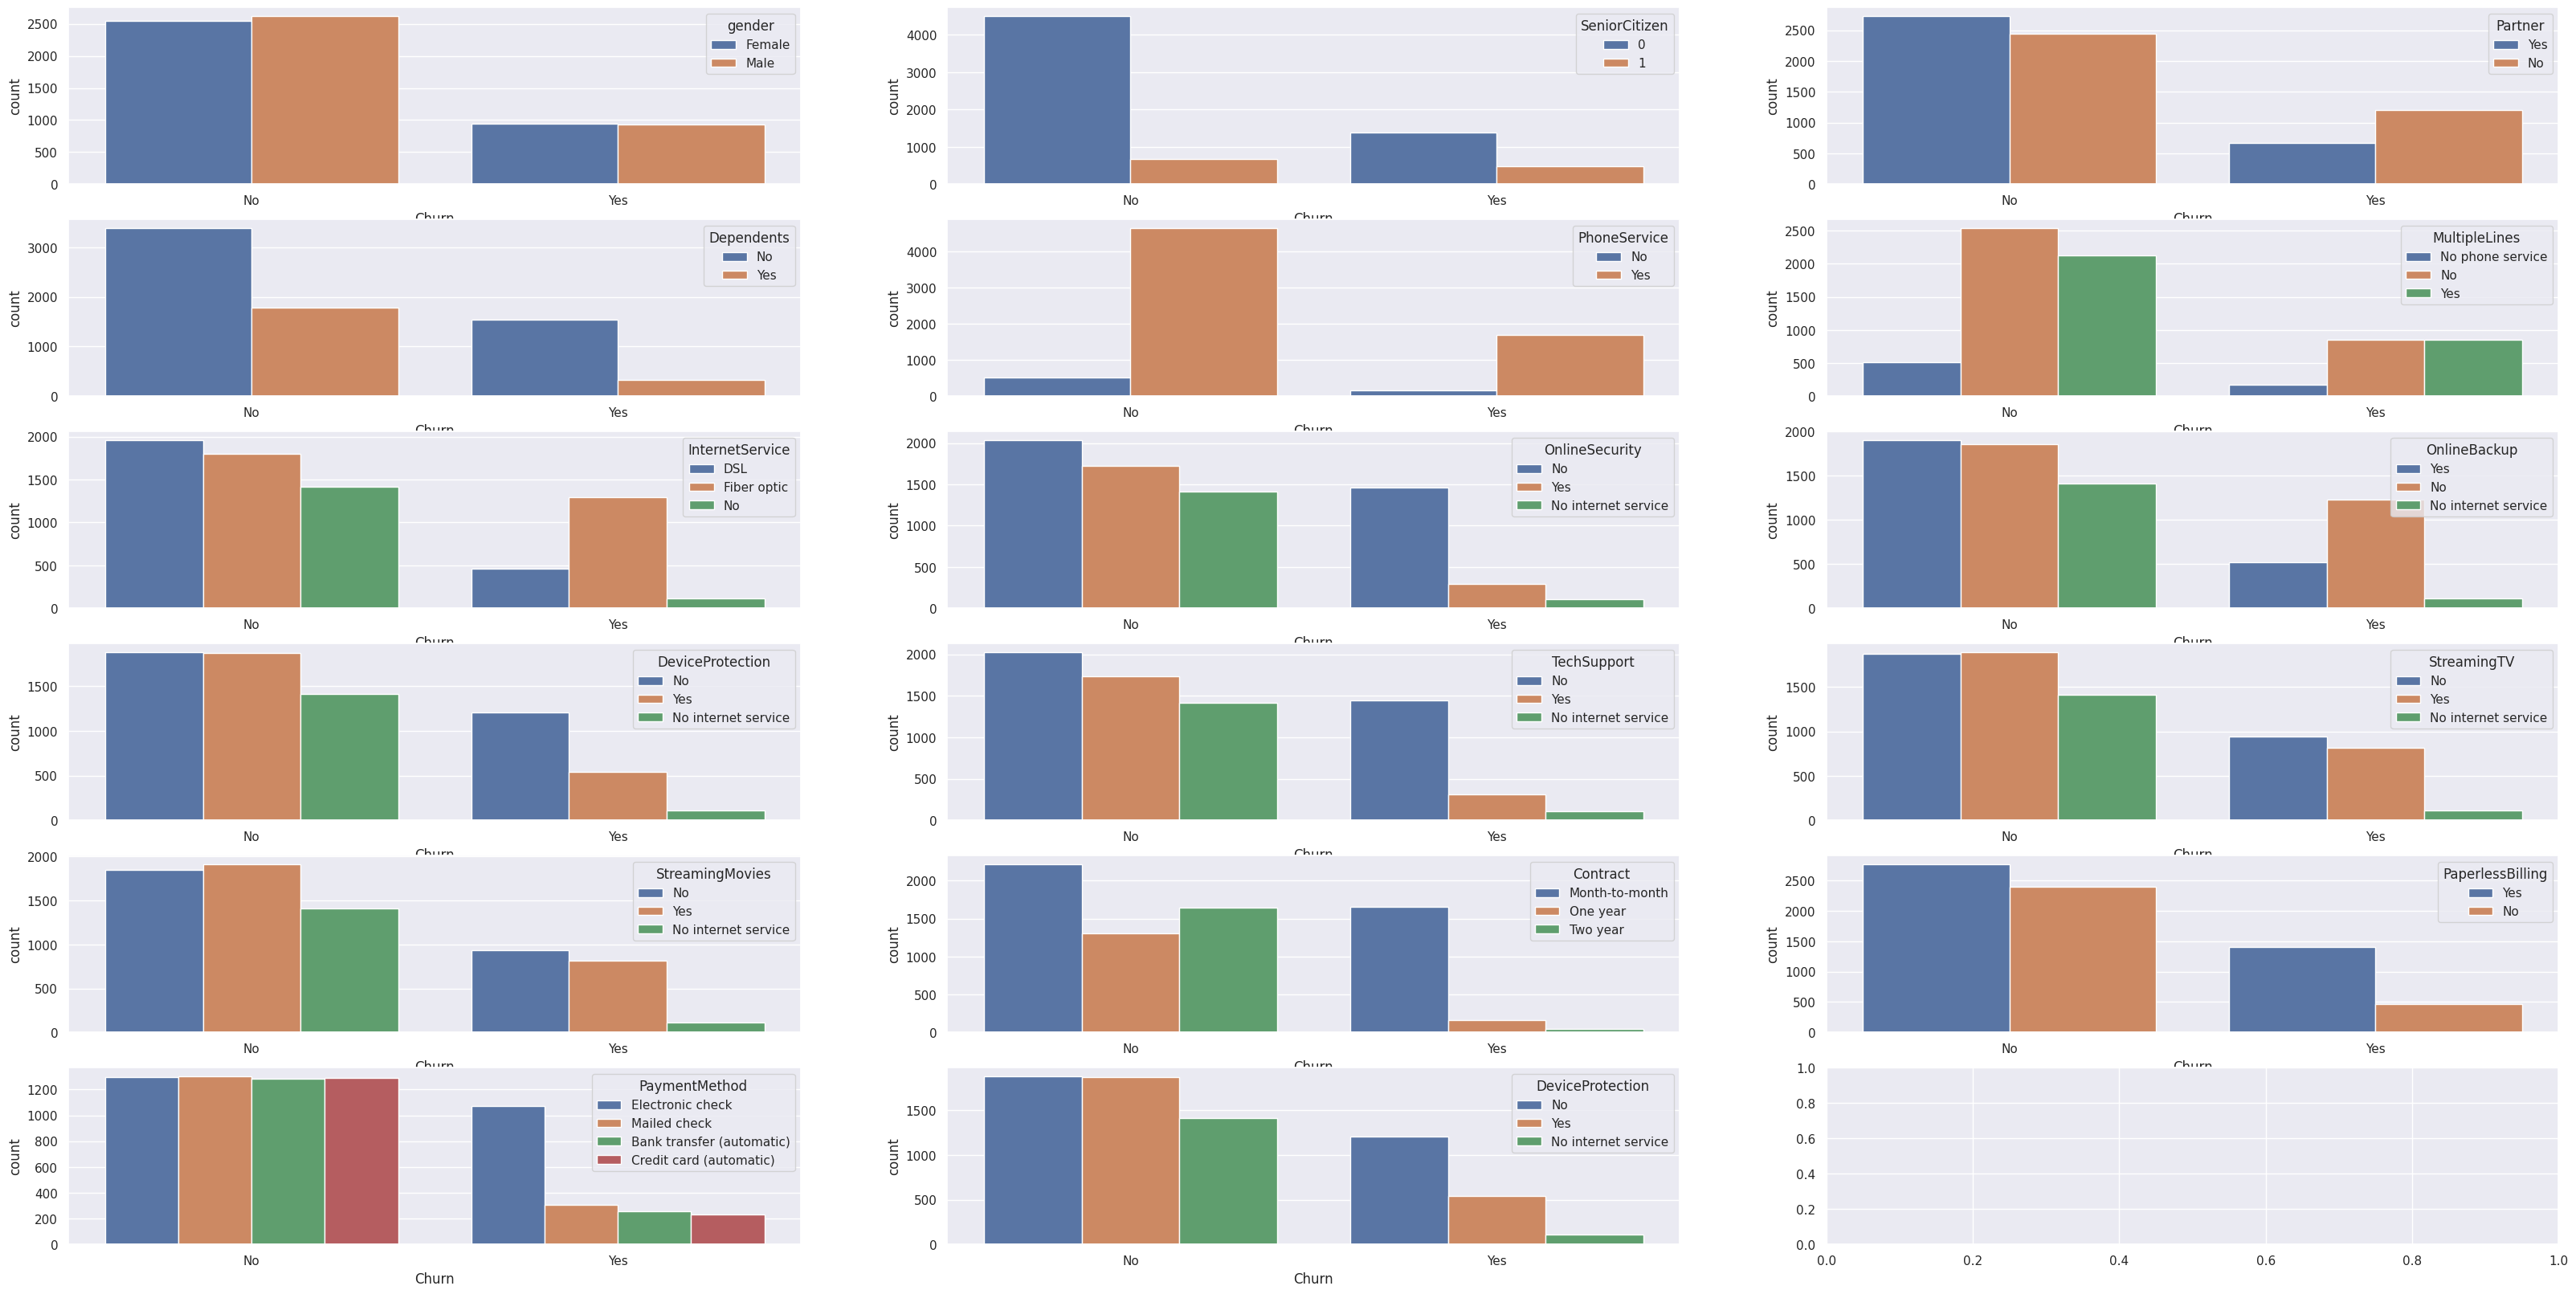

In [144]:
# understand categorical feature
_,axss = plt.subplots(6,3, figsize=[40,20])
sns.countplot(x='Churn', hue='gender', data=df, ax=axss[0][0])
sns.countplot(x='Churn', hue='SeniorCitizen', data=df, ax=axss[0][1])
sns.countplot(x='Churn', hue='Partner', data=df, ax=axss[0][2])
sns.countplot(x='Churn', hue='Dependents', data=df, ax=axss[1][0])
sns.countplot(x='Churn', hue='PhoneService', data=df, ax=axss[1][1])
sns.countplot(x='Churn', hue='MultipleLines', data=df, ax=axss[1][2])
sns.countplot(x='Churn', hue='InternetService', data=df, ax=axss[2][0])
sns.countplot(x='Churn', hue='OnlineSecurity', data=df, ax=axss[2][1])
sns.countplot(x='Churn', hue='OnlineBackup', data=df, ax=axss[2][2])
sns.countplot(x='Churn', hue='DeviceProtection', data=df, ax=axss[3][0])
sns.countplot(x='Churn', hue='TechSupport', data=df, ax=axss[3][1])
sns.countplot(x='Churn', hue='StreamingTV', data=df, ax=axss[3][2])
sns.countplot(x='Churn', hue='StreamingMovies', data=df, ax=axss[4][0])
sns.countplot(x='Churn', hue='Contract', data=df, ax=axss[4][1])
sns.countplot(x='Churn', hue='PaperlessBilling', data=df, ax=axss[4][2])
sns.countplot(x='Churn', hue='PaymentMethod', data=df, ax=axss[5][0])
sns.countplot(x='Churn', hue='DeviceProtection', data=df, ax=axss[5][1])

<Axes: ylabel='gender'>

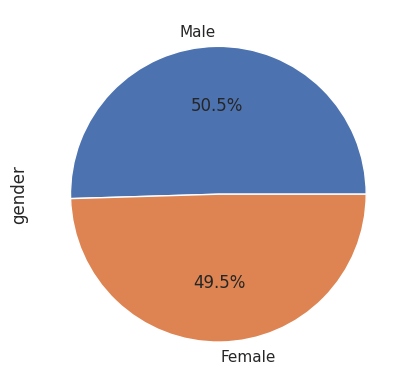

In [145]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Odservation: There is no big difference between genders and can be dropped.

<Axes: ylabel='Churn'>

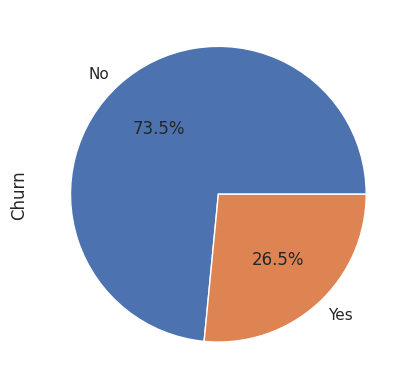

In [146]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [147]:
to_drop = ['customerID','gender','Churn']
X = df.drop(to_drop, axis = 1)

In [148]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [149]:
X.shape

(7043, 18)

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [151]:
X.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

Divide columns into numerical ones and catagorical ones.

In [152]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[X.dtypes != 'object']

In [153]:
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [154]:
cat_cols

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [155]:
y=df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [156]:
from sklearn import model_selection

In [157]:
#Label_Encoding
from sklearn.preprocessing import LabelEncoder

feature=X.columns
for i in range(len(X.columns)):
  dataframe_series=X[feature[i]]
  if dataframe_series.dtype=='object':
    X[feature[i]] = LabelEncoder().fit_transform(X[feature[i]])

In [158]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


# 3. Data Split and Standardization

In [159]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state = 42)
print('training data has ' + str(X_train.shape[0]) + \
      ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + \
      ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 5282 observation with 18 features
test data has 1761 observation with 18 features


In [160]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6661,0,1,1,72,0,1,0,0,2,0,2,2,2,2,0,1,53.65,3784.00
4811,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,3,46.00,193.60
2193,0,0,1,56,1,0,2,1,1,1,1,1,1,1,1,3,21.20,1238.65
1904,0,0,0,56,1,2,1,0,2,0,2,0,2,0,1,2,94.45,5124.60
6667,0,0,0,9,1,0,1,0,0,0,0,0,2,0,1,2,79.55,723.40


In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [162]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6661,-0.439776,1,1,1.609608,0,1,0,0,2,0,2,2,2,2,0,1,-0.371461,0.651915
4811,-0.439776,0,0,-1.151780,1,0,0,0,0,0,0,0,0,0,1,3,-0.625032,-0.920609
2193,-0.439776,0,1,0.959870,1,0,2,1,1,1,1,1,1,1,1,3,-1.447065,-0.462898
1904,-0.439776,0,0,0.959870,1,2,1,0,2,0,2,0,2,0,1,2,0.980917,1.239072
6667,-0.439776,0,0,-0.948737,1,0,1,0,0,0,0,0,2,0,1,2,0.487034,-0.688567


# 4. Model Training and Evaluation

In [163]:
# build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

## 4.1 Direct logistic regression

If you cannot see the figure below, please click the following link: https://nbviewer.org/github/rayxuan2000/Project/blob/main/Telco_Customer_Churn.ipynb

In [164]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [165]:
classifier_logistic.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [166]:
classifier_logistic.score(X_test, y_test)

0.8029528676888131

In [167]:
from sklearn.metrics import classification_report,confusion_matrix
prediction_Regression = classifier_logistic.predict(X_test)
print(classification_report(y_test,prediction_Regression))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1294
         Yes       0.65      0.56      0.60       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761



Text(46.25, 0.5, 'true')

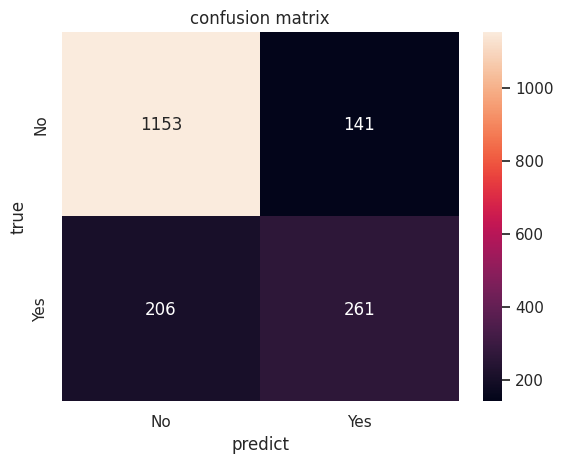

In [168]:
sns.set()
f,ax=plt.subplots()
cm_LR= confusion_matrix(y_test, prediction_Regression)
sns.heatmap(cm_LR,annot=True,ax=ax,fmt='.20g',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

## 4.2 GridSearch method to find optimized hyperparameters.

In [169]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

###4.2.1 Possible hyperparamter options for logistic regression

In [170]:
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.04, 0.05, 0.1, 0.2, 0.5)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 7)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.04, 0.05, 0.1, 0.2, 0.5),
                         'penalty': ('l2', 'l1')})

In [171]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8048074099912419
Best parameters set:
C:0.1
penalty:l2


In [172]:
best_LR_model = Grid_LR.best_estimator_

In [173]:
best_LR_model.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [174]:
cm_LR_CV= confusion_matrix(y_test, best_LR_model.predict(X_test))

In [175]:
# best_LR_model.score(X_test, y_test)

In [176]:
# prediction_Regression = best_LR_model.predict(X_test)
# print(classification_report(y_test,prediction_Regression))

<ipython-input-177-990a4e8b9ba5>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')


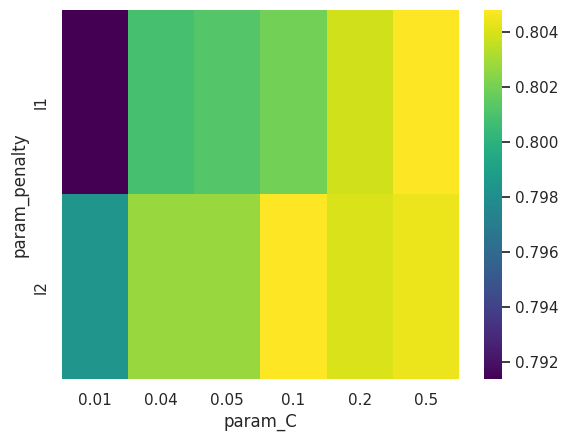

In [177]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

### 4.2.2 Possible hyperparamter options for KNN




In [178]:
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=7)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [179]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.7667501486866639
Best parameters set:
n_neighbors:9


In [180]:
best_KNN_model = Grid_KNN.best_estimator_

In [181]:
best_KNN_model.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [182]:
cm_KNN_CV= confusion_matrix(y_test, best_KNN_model.predict(X_test))

In [183]:
# best_KNN_model.score(X_test, y_test)

In [184]:
# prediction_Regression = best_KNN_model.predict(X_test)
# print(classification_report(y_test,prediction_Regression))

### 4.2.3 Possible hyperparamter options for Random Forest

In [185]:
# Choose the number of trees
parameters = {
    'n_estimators' : [20,40,60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=7)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [186]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8004496987369789
Best parameters set:
max_depth:10
n_estimators:40


In [187]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [188]:
cm_RF_CV= confusion_matrix(y_test, best_RF_model.predict(X_test))

In [189]:
# best_RF_model.score(X_test, y_test)

In [190]:
# prediction_Regression = best_RF_model.predict(X_test)
# print(classification_report(y_test,prediction_Regression))

In [191]:
# change parameter?
# from sklearn.svm import SVC

# classifier_SVC = SVC()
# classifier_SVC.fit(X_train,y_train)
# # cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)

In [192]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
# mlp.fit(X_train,y_train)
# # predictions = mlp.predict(X_test)

## 4.3 Compare different best models

In [193]:
def print_classification_report(model):
  prediction = model.predict(X_test)
  print(classification_report(y_test,prediction))

In [194]:
def plot_confusion_matrix(cm, model,title):
    sns.set()
    f,ax=plt.subplots()
    prediction = model.predict(X_test)
    sns.heatmap(cm,annot=True,ax=ax,fmt='.20g',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
    ax.set_title('confusion matrix')
    ax.set_xlabel('predict')
    ax.set_ylabel('true')
    ax.set_title(title[i])

RF
  
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1294
         Yes       0.67      0.49      0.56       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

KNN
  
              precision    recall  f1-score   support

          No       0.83      0.86      0.84      1294
         Yes       0.57      0.52      0.54       467

    accuracy                           0.77      1761
   macro avg       0.70      0.69      0.69      1761
weighted avg       0.76      0.77      0.76      1761

LR
  
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1294
         Yes       0.64      0.54      0.59       467

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



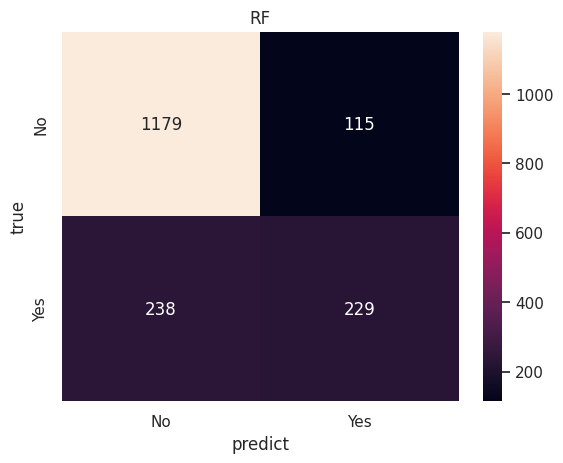

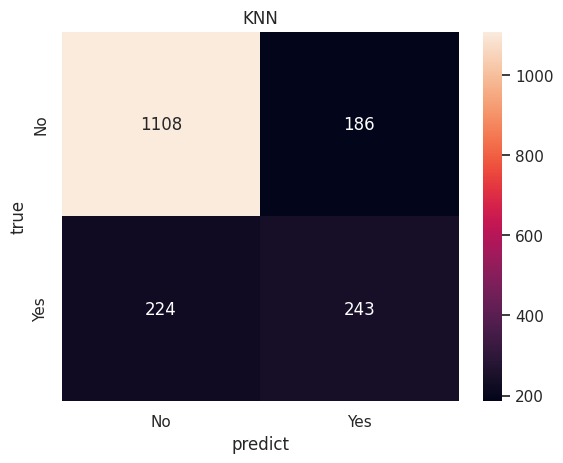

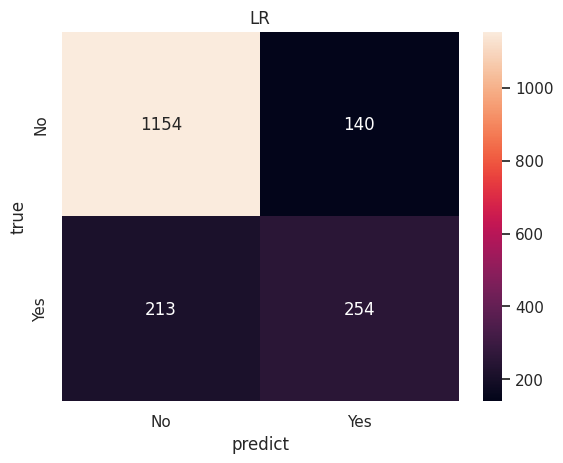

In [195]:
#best_RF_model, best_KNN_model, best_LR_model
cm_lst=[cm_RF_CV,cm_KNN_CV,cm_LR_CV]
model_lst=[best_RF_model,best_KNN_model,best_LR_model]
title=['RF','KNN','LR']

for i in range(len(cm_lst)):
  print(title[i])
  print("  ")
  print_classification_report(model_lst[i])

for i in range(len(cm_lst)):
  plot_confusion_matrix(cm_lst[i],model_lst[i],title)
  print("  ")

## 4.4 Plot ROC curve

In [196]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
y_test = y_test.map({'Yes': 1, 'No': 0}).astype(int)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [197]:
best_RF_model.predict_proba(X_test)

array([[0.83816982, 0.16183018],
       [0.96218302, 0.03781698],
       [0.98793162, 0.01206838],
       ...,
       [0.85237673, 0.14762327],
       [0.64199637, 0.35800363],
       [0.8037333 , 0.1962667 ]])

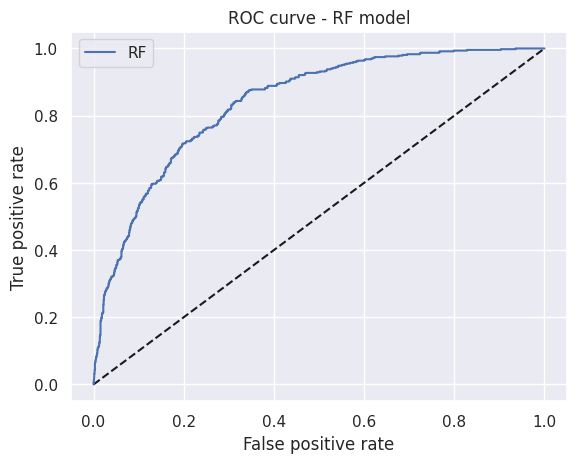

In [198]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [199]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.839824060314613

In [200]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

In [201]:
best_LR_model.predict_proba(X_test)

array([[0.79160283, 0.20839717],
       [0.94172233, 0.05827767],
       [0.95414466, 0.04585534],
       ...,
       [0.85160863, 0.14839137],
       [0.59764927, 0.40235073],
       [0.5416496 , 0.4583504 ]])

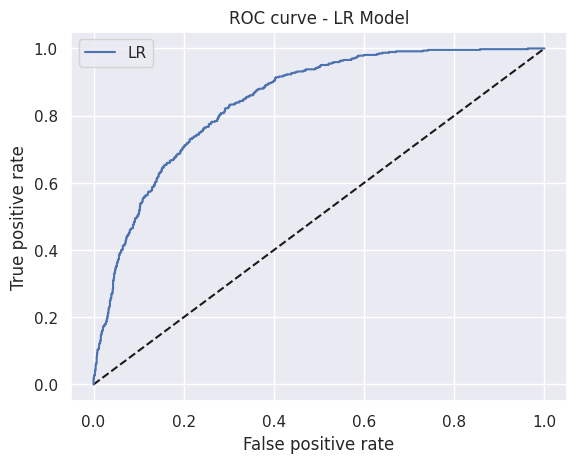

In [202]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [203]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8429020119212707

##4.5 Feature Importance

In [206]:
scaler = StandardScaler()
X_with_corr = X.copy()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear')
LRmodel_l2.fit(X_l2, y)

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],\
            round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
tenure : -1.088
MonthlyCharges : 0.725
Contract : -0.5692
TotalCharges : 0.333
PhoneService : -0.2786
OnlineSecurity : -0.2301
TechSupport : -0.2218
PaperlessBilling : 0.1779
InternetService : 0.1722
OnlineBackup : -0.1227
SeniorCitizen : 0.0882
Dependents : -0.0796
DeviceProtection : -0.0749
MultipleLines : 0.0733
PaymentMethod : 0.0582
StreamingMovies : 0.008
StreamingTV : 0.0033
Partner : 0.0021


<Axes: xlabel='Churn', ylabel='count'>

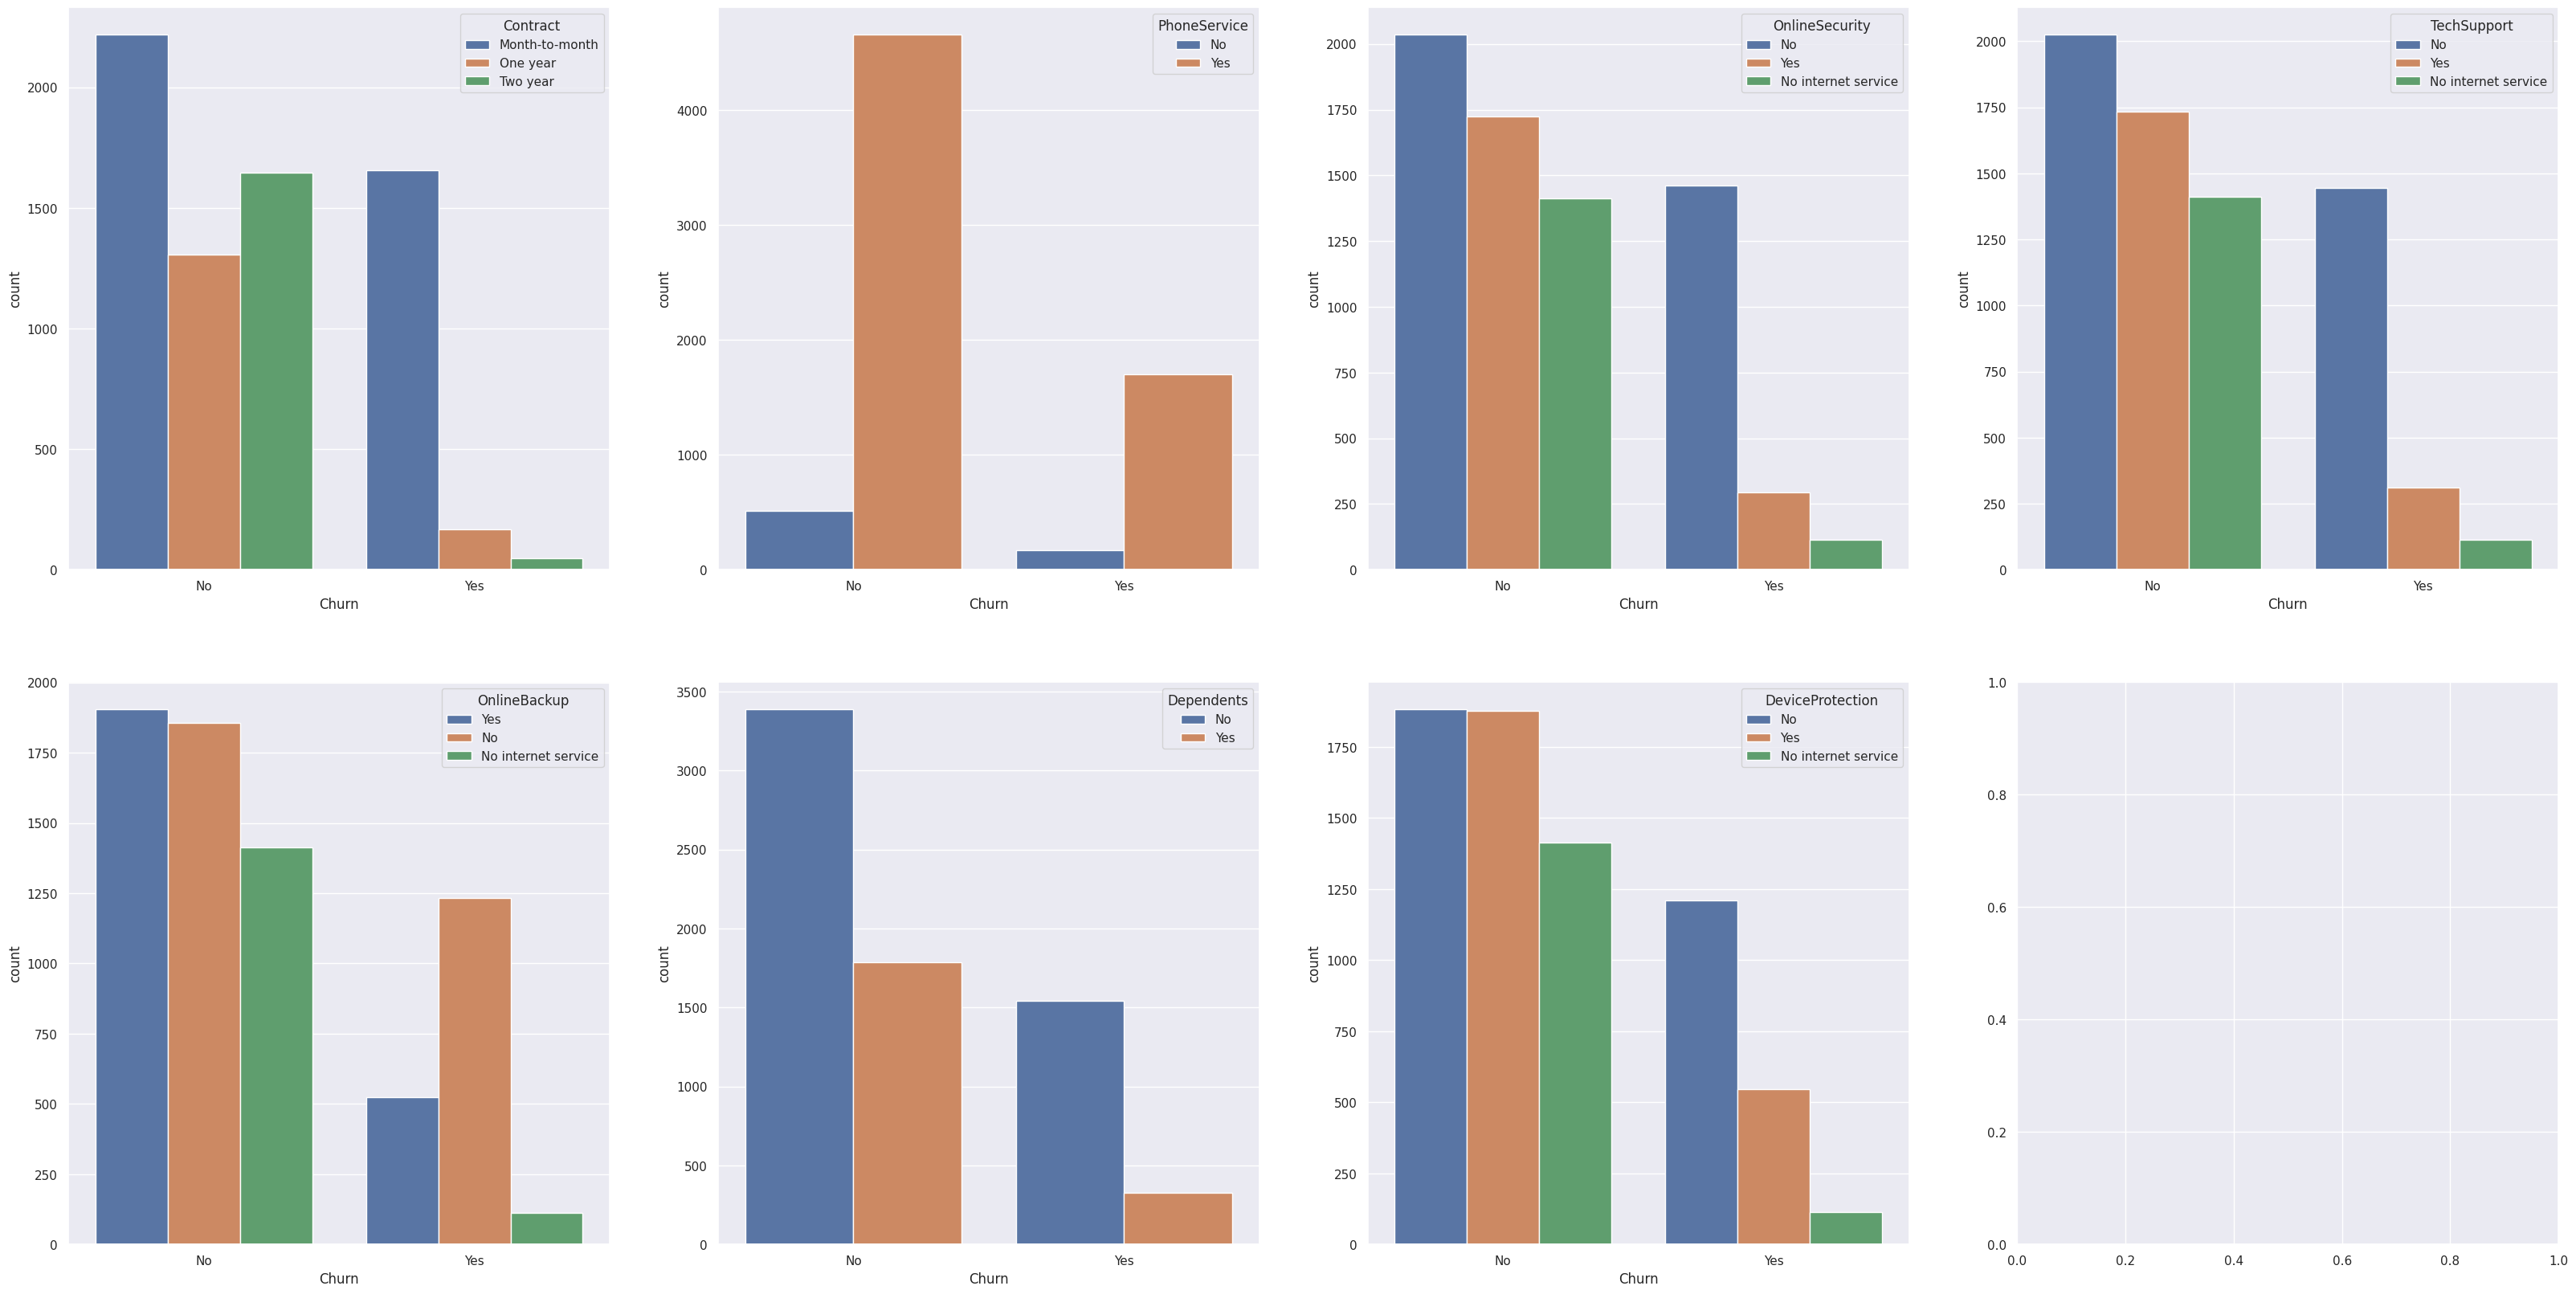

In [207]:
_,axss = plt.subplots(2,4, figsize=[40,20])
sns.countplot(x='Churn', hue='Contract', data=df, ax=axss[0][0])
sns.countplot(x='Churn', hue='PhoneService', data=df, ax=axss[0][1])
sns.countplot(x='Churn', hue='OnlineSecurity', data=df, ax=axss[0][2])
sns.countplot(x='Churn', hue='TechSupport', data=df, ax=axss[0][3])
sns.countplot(x='Churn', hue='OnlineBackup', data=df, ax=axss[1][0])
sns.countplot(x='Churn', hue='Dependents', data=df, ax=axss[1][1])
sns.countplot(x='Churn', hue='DeviceProtection', data=df, ax=axss[1][2])

Advice: The company should promote several aspects such as phone service, online security, tech support, online backup and device protection, avoid month-to-month contract and focus on non-dependent customers to overcome customer churn.